In [43]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('../data/raw/imagenette2-160/train/n01440764/ILSVRC2012_val_00009346.JPEG'))
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

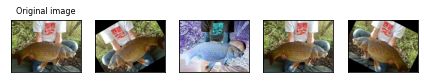

In [55]:
policy = T.AutoAugmentPolicy.IMAGENET
autoAugment = T.AutoAugment(policy)
horizFlip = T.RandomHorizontalFlip(p=0.5)
vertFlip = T.RandomVerticalFlip(p=0.5)

imgs = [vertFlip(horizFlip(autoAugment(orig_img))) for _ in range(4)]

row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs)